## Цель работы: изучение и анализ поисковых алгоритмов минимизации функции одной переменной: дихотомического, Фибоначчи и «золотого сечения».

## Вариант 5
$$
f(x) =(x+5)^4, a = -6, b = x
$$

### Реализация методов

In [15]:
class OneDimensionalOptimization:
    def __init__(self, a, b, func):
        self.a, self.b = a, b
        self.func = func

    def dihotomy(self, eps = 0.001):
        a, b = self.a, self.b
        size = b - a
        iter = 0
        
        while (size > 2*eps):
            center = (a+b)/2
            x1, x2 = center - eps/2, center + eps/2
            
            if self.func(x1) > self.func(x2):
                a = x1
            else:
                b = x2

            size = b - a
            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return self.func((a+b)/2), iter

    def nums(self, n):
        res = []
        fib1 = fib2 = 1
        res.append(fib1)
        res.append(fib2)
        n -= 2
         
        while n > 0:
            fib1, fib2 = fib2, fib1 + fib2
            res.append(fib2)
            n -= 1
            
        return res

    def fibonacci(self, n):
        a, b = self.a, self.b
        F, L = self.nums(n), b - a
        f1, f2 = 0, 0
        k = n - 1
        iter = 0
        
        while (k > 1):
            delta = (F[k-1]/F[k])*L
            x1, x2 = a + delta, b - delta
            f1, f2 = self.func(x1), self.func(x2)
            if f1 > f2:
                b = x1
                f1, x1 = f2, x2
                L = b - a
                x2, f2 = a + b - x1, self.func(x2)
            else:
                a = x2
                f2, x2 = f1, x1
                L = b - a
                x1, f1 = b - (x2 - a), self.func(x1)
            k -= 1
            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        if f1 > f2:
            return f2, iter
        else:
            return f1, iter

    def golden_ratio(self, tau = 0.618, eps = 0.001):
        a, b = self.a, self.b
        L = b - a
        iter = 0
        f1, f2 = 0, 0

        while(L > eps):
            delta =  L*tau
            x1, x2 = a + delta, b - delta
            f1, f2 = self.func(x1), self.func(x2)
    
            if f1 > f2:
                b = x1
                f1, x1 = f2, x2
                L = b - a
                x2, f2 = a + b - x1, self.func(x2)
    
            else:
                a = x2
                f2, x2 = f1, x1
                L = b - a
                x1, f1 = b - (x2 - a), self.func(x1)

            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')
                
        if f1 > f2:
            return f2, iter
        else:
            return f1, iter

### Тестирование

In [16]:
odo = OneDimensionalOptimization(-6, 2, lambda x: (x+5)**4)

In [17]:
dih = odo.dihotomy(eps = 0.1)
print(dih)

iter: 1 | set: [-6,-1.95]
iter: 2 | set: [-6,-3.9250000000000003]
iter: 3 | set: [-6,-4.9125000000000005]
iter: 4 | set: [-5.5062500000000005,-4.9125000000000005]
iter: 5 | set: [-5.259375,-4.9125000000000005]
iter: 6 | set: [-5.1359375,-4.9125000000000005]
iter: 7 | set: [-5.07421875,-4.9125000000000005]
(1.9446248188606524e-09, 7)


In [18]:
fib = odo.fibonacci(10)
print(fib)

iter: 1 | set: [-6,-1.0545454545454547]
iter: 2 | set: [-6,-2.9454545454545453]
iter: 3 | set: [-6,-4.109090909090909]
iter: 4 | set: [-5.272727272727273,-4.109090909090909]
iter: 5 | set: [-5.272727272727273,-4.545454545454546]
iter: 6 | set: [-5.272727272727273,-4.836363636363637]
iter: 7 | set: [-5.127272727272728,-4.836363636363637]
iter: 8 | set: [-4.981818181818182,-4.836363636363637]
(1.0928215285839811e-07, 8)


In [19]:
gld = odo.golden_ratio(eps = 0.1)
print(gld)

iter: 1 | set: [-6,-1.056]
iter: 2 | set: [-6,-2.944608]
iter: 3 | set: [-6,-4.111767744]
iter: 4 | set: [-5.278695278208,-4.111767744]
iter: 5 | set: [-5.278695278208,-4.557534062067456]
iter: 6 | set: [-5.278695278208,-4.833017646633143]
iter: 7 | set: [-5.108446422946405,-4.833017646633143]
iter: 8 | set: [-5.108446422946405,-4.9382314391848094]
iter: 9 | set: [-5.043424299149476,-4.9382314391848094]
iter: 10 | set: [-5.043424299149476,-4.978415111691312]
(1.1028488458112347e-10, 10)


### Составление таблиц

In [20]:
import numpy as np

In [21]:
eps_set = np.arange(0.001, 0.1, 0.01)
n_set = np.arange(2, 15, 1)

In [22]:
results_dih = []
results_gld = []
results_fib = []
for i in eps_set:
    results_dih.append(odo.dihotomy(eps = i)[0])
    results_gld.append(odo.golden_ratio(eps = i)[0])

for i in n_set:
    results_fib.append(odo.fibonacci(i)[0])

iter: 1 | set: [-6,-1.9995]
iter: 2 | set: [-6,-3.99925]
iter: 3 | set: [-6,-4.999125]
iter: 4 | set: [-5.500062499999999,-4.999125]
iter: 5 | set: [-5.25009375,-4.999125]
iter: 6 | set: [-5.125109375,-4.999125]
iter: 7 | set: [-5.0626171875,-4.999125]
iter: 8 | set: [-5.03137109375,-4.999125]
iter: 9 | set: [-5.015748046874999,-4.999125]
iter: 10 | set: [-5.0079365234374995,-4.999125]
iter: 11 | set: [-5.00403076171875,-4.999125]
iter: 12 | set: [-5.002077880859375,-4.999125]
iter: 13 | set: [-5.001101440429687,-4.999125]
iter: 1 | set: [-6,-1.056]
iter: 2 | set: [-6,-2.944608]
iter: 3 | set: [-6,-4.111767744]
iter: 4 | set: [-5.278695278208,-4.111767744]
iter: 5 | set: [-5.278695278208,-4.557534062067456]
iter: 6 | set: [-5.278695278208,-4.833017646633143]
iter: 7 | set: [-5.108446422946405,-4.833017646633143]
iter: 8 | set: [-5.108446422946405,-4.9382314391848094]
iter: 9 | set: [-5.043424299149476,-4.9382314391848094]
iter: 10 | set: [-5.043424299149476,-4.978415111691312]
iter: 11

In [23]:
import pandas as pd

In [24]:
dih_gld = pd.DataFrame(data = {'eps': eps_set, 'dihotomy': results_dih, 'golden_ratio': results_gld})

In [25]:
dih_gld

,eps,dihotomy,golden_ratio
0,0.001,1.643221e-16,5.256063e-16
1,0.011,2.523079e-15,2.006173e-14
2,0.021,4.747619e-17,1.111186e-10
3,0.031,2.180616e-10,1.107012e-10
4,0.041,8.336757e-16,1.113772e-10
5,0.051,1.678887e-10,1.113772e-10
6,0.061,2.948950e-09,1.113772e-10
7,0.071,3.572899e-10,1.102849e-10
8,0.081,9.736083e-14,1.102849e-10
9,0.091,1.089086e-10,1.102849e-10


In [26]:
fibo = pd.DataFrame(data = {'n': n_set, 'fibonacci': results_fib})

In [27]:
fibo

,n,fibonacci
0,2,0.000000e+00
1,3,8.100000e+01
2,4,7.716049e+00
3,5,1.296000e-01
4,6,0.000000e+00
5,7,2.836035e-03
6,8,4.164931e-04
7,9,1.197304e-05
8,10,1.092822e-07
9,11,1.593823e-08


### График

In [33]:
eps_set = np.arange(0.001, 0.1, 0.001)
iters_dih = []
iters_gld = []
for i in eps_set:
    iters_dih.append(odo.dihotomy(eps = i)[1])
    iters_gld.append(odo.golden_ratio(eps = i)[1])

iter: 1 | set: [-6,-1.9995]
iter: 2 | set: [-6,-3.99925]
iter: 3 | set: [-6,-4.999125]
iter: 4 | set: [-5.500062499999999,-4.999125]
iter: 5 | set: [-5.25009375,-4.999125]
iter: 6 | set: [-5.125109375,-4.999125]
iter: 7 | set: [-5.0626171875,-4.999125]
iter: 8 | set: [-5.03137109375,-4.999125]
iter: 9 | set: [-5.015748046874999,-4.999125]
iter: 10 | set: [-5.0079365234374995,-4.999125]
iter: 11 | set: [-5.00403076171875,-4.999125]
iter: 12 | set: [-5.002077880859375,-4.999125]
iter: 13 | set: [-5.001101440429687,-4.999125]
iter: 1 | set: [-6,-1.056]
iter: 2 | set: [-6,-2.944608]
iter: 3 | set: [-6,-4.111767744]
iter: 4 | set: [-5.278695278208,-4.111767744]
iter: 5 | set: [-5.278695278208,-4.557534062067456]
iter: 6 | set: [-5.278695278208,-4.833017646633143]
iter: 7 | set: [-5.108446422946405,-4.833017646633143]
iter: 8 | set: [-5.108446422946405,-4.9382314391848094]
iter: 9 | set: [-5.043424299149476,-4.9382314391848094]
iter: 10 | set: [-5.043424299149476,-4.978415111691312]
iter: 11

In [34]:
eps_set = np.log(eps_set)

In [35]:
import matplotlib.pyplot as plt

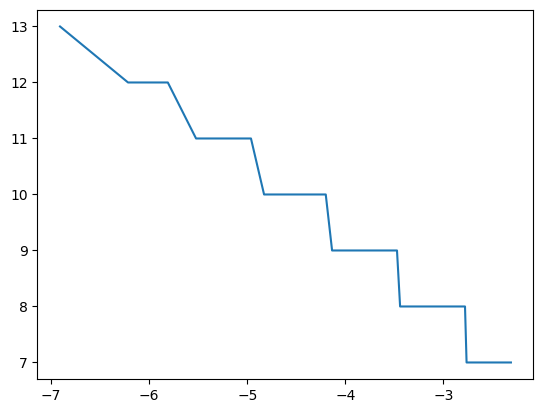

In [36]:
plt.plot(eps_set, iters_dih)
plt.show()

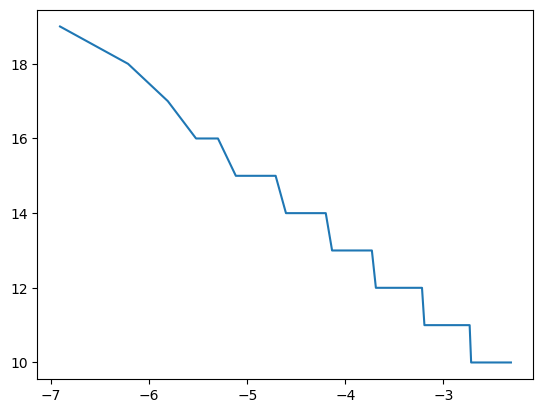

In [37]:
plt.plot(eps_set, iters_gld)
plt.show()